1) This month we hosted our 2023 Trump Golf Summit at the iconic @TrumpDoral. It was an honor to join together with 18 of our incredible teams from all over the globe for this truly unforgettable event! We are beyond grateful to have you all as part of our @TrumpGolf family. https://t.co/9ZjmUHUmfw

2) RT @TrumpGolf: A look back at our 2023 Trump Golf Summit: Part II. We are beyond grateful to have so many amazing, talented employees as pa…

3) RT @TrumpGolf: A look back at our 2023 Trump Golf Summit: Part I. It was an honor to host our incredible teams from all over the globe for…

4) RT @TrumpGolf: Trump Golf Summit 2023 | An incredible week packed with compelling presentations, a Q&amp;A with @DJohnsonPGA, experiential dini…

5) It's Opening Day at @TrumpFerryPoint! Take in the iconic New York City skyline while enjoying world-class golf in a world-class setting. 

Book your tee time on https://t.co/XCveOo0yXH. https://t.co/lhreEn7EnB

6) Today we celebrate our thousands of exceptio

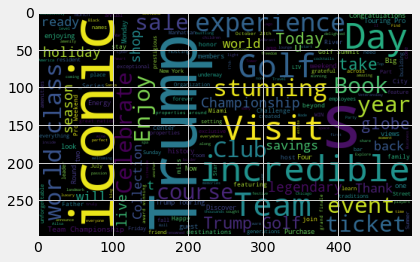

                                                Tweet  Subjectivity  Polarity  \
0   This month we hosted our 2023 Trump Golf Summi...      0.800000  0.800000   
1   : A look back at our 2023 Trump Golf Summit: P...      0.575000  0.450000   
2   : A look back at our 2023 Trump Golf Summit: P...      0.450000  0.450000   
3   : Trump Golf Summit 2023 | An incredible week ...      0.750000  0.600000   
4   It's Opening Day at ! Take in the iconic New Y...      0.518182  0.378788   
..                                                ...           ...       ...   
95  Perfect scene for the FirstDayOfSummer: Loungi...      0.731481  0.501852   
96  To the incredible fathers in our Trump Organiz...      0.950000  0.950000   
97  Celebrate the Stars and Stripes with \n Flag D...      0.750000  0.200000   
98  From hats and ties to drinkware and grilling e...      0.571429  0.446429   
99  An enchanting travel experience awaits you at ...      1.000000  0.500000   

    Analysis  
0   Positive

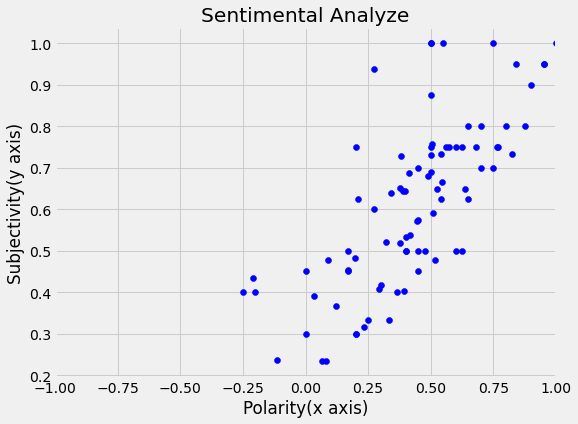

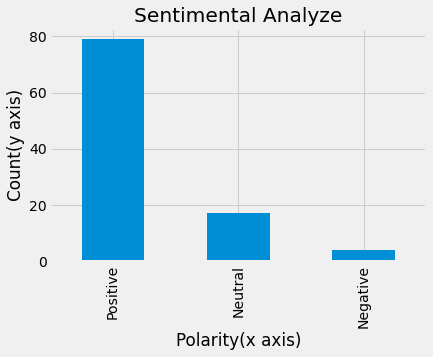

1) This month we hosted our 2023 Trump Golf Summit at the iconic . It was an honor to join together with 18 of our incredible teams from all over the globe for this truly unforgettable event! We are beyond grateful to have you all as part of our  family. 

2) : A look back at our 2023 Trump Golf Summit: Part II. We are beyond grateful to have so many amazing, talented employees as pa…

3) : A look back at our 2023 Trump Golf Summit: Part I. It was an honor to host our incredible teams from all over the globe for…

4) : Trump Golf Summit 2023 | An incredible week packed with compelling presentations, a Q&amp;A with , experiential dini…

5) It's Opening Day at ! Take in the iconic New York City skyline while enjoying world-class golf in a world-class setting. 

Book your tee time on  

6) Today we celebrate our thousands of exceptional employees! The passion, drive, and enthusiasm exhibited by the  team in this video is exactly what you will be met with when visiting any of our world-cla

In [2]:
import tweepy  # to gather tweeter data
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

# Twitter API Credentials
APIkey = "3OMBrpi6hg5kvQ3Zb1LMFwaEQ"
APISecretKey = "f9fEg3dmaEtqaoZW90MqvElUBV7LvKHOg2zbOPDpmPBvD8BYFt"
accessToken = "1529864260473409545-9wzTxuhcOAc5xwvtpeHYw51NpsQby3"
accessTokenSecret = "ffiOk1LMVMggUkFvMQKTVtroqQOMhJVfGc1605Iv23Tqy"
# create the object for authentication
Auth = tweepy.OAuthHandler(APIkey, APISecretKey)
Auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(Auth)
# display
posts = api.user_timeline(
    screen_name='Trump', count=100, tweet_mode='extended')
i = 1
# print(posts)
for tweet in posts[:10]:  # just want to see the top 10 from 100
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i+1

# Creating dataframe with a column having name "tweets"
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweet'])
print(df)

# make a function to clean tweets


def cleanTxt(texts):
    texts = re.sub('@[A-Za-z0-9]+', '', texts)  # removing mentions
    texts = re.sub("#", '', texts)  # removing 
    texts = re.sub('RT[\s]+', '', texts)  # removing Retweets
    texts = re.sub('https?:\/\/\S+', '', texts)  # removing links
    return texts


df['Tweet'] = df['Tweet'].apply(cleanTxt)
print(df)
# sentiments
analysis = TextBlob("Yesterday was a brilliant day")
analysis.sentiment
# creating function to get the tweet subjectivity


def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# creating function to get the tweet Polarity


def get_polarity(text):
    return TextBlob(text).sentiment.polarity


# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweet'].apply(get_subjectivity)
df['Polarity'] = df['Tweet'].apply(get_polarity)
print(df)

# Lets do Analysis

# Word Cloud Visualization
allwords = ' '.join([i for i in df['Tweet']])
Cloud = WordCloud(width=500, height=300, random_state=0,
                  max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

# Creating function to process positive,neutral and negative


def getAnalysis(ranking):
    if ranking < 0:
        return 'Negative'
    elif ranking == 0:
        return 'Neutral'
    else:
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
print(df)

df[df['Analysis'] == 'Neutral']

df['Analysis'].value_counts()


print(df.shape)

# plotting scatter plotgit
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title("Sentimental Analyze")
plt.xlim(-1, 1)
plt.xlabel('Polarity(x axis)')
plt.ylabel('Subjectivity(y axis)')
plt.show()
# Only 3 neutral tweets would be shown because of data overlap

df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentimental Analyze")
plt.xlabel('Polarity(x axis)')
plt.ylabel('Count(y axis)')
plt.show()

# Lets get positive tweets only
i = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j] == 'Positive'):
        print(str(i) + ') ' + sortedDF['Tweet'][j])
        print()
        i = i+1

# Lets get negative tweets only
i = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j] == 'Negative'):
        print(str(i) + ') ' + sortedDF['Tweet'][j])
        print()
        i = i+1


# Lets get neutral tweets only
i = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j] == 'Neutral'):
        print(str(i) + ') ' + sortedDF['Tweet'][j])
        print()
        i = i+1